___
# Ciência dos Dados - PROJETO 2

___
### **Guilherme Lotaif, Renato Tajima, Thiago Verardo**
___



## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___ 
## Importando e limpando a base de dados

Para obter uma maior performance do algoritimo de previsão temos que: remover alguns caratcteres que não vão ajudar a fazer as previsões, pelo contrário, não remove-los só prejudica a ação do classificador, e outro método de limpeza utilizado é a transformção de todas palavras para letra minúscula, assim eliminando a existência da mesma palavra de diferentes maneiras.



**Importando as bibliotecas que serão utilizadas:**

In [71]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
import warnings

**Vamos abrir o arquivo:**<br>
O arquivo que vamos utilizar contém emails classificados como SPAM ou HAM.

In [2]:
print('Esperamos trabalhar no diretório:')
print(os.getcwd())

Esperamos trabalhar no diretório:
/Users/guilherme/Documents/Insper/2 Semestre DPA/Ciência dos Dados/Projetos/Projeto 2


In [3]:
#Abrindo o arquivo com os emails:
df = pd.read_excel('spamham2019.xlsx')

In [4]:
#Dataframe do arquivo importado:
df.sample(2)

,Email,Class
2712,Nope i'm not drivin... I neva develop da photo...,ham
885,Gibbs unsold.mike hussey,ham


...

Vamos criar uma função para limpar o dataframe:

In [5]:
#Criando a função para remover os caracteres que atrapalham o classificador:
def Replacer (emails):
    #vamos subtituir cada caractere indesejado por um espaço:
    emails = emails.replace("*","")
    emails = emails.replace("!","")
    emails = emails.replace("@","")
    emails = emails.replace("#","")
    emails = emails.replace("$","")
    emails = emails.replace("%","")
    emails = emails.replace("&","")
    emails = emails.replace("-","")
    emails = emails.replace("_","")
    emails = emails.replace("+","")
    emails = emails.replace("=","")
    emails = emails.replace("'","")
    emails = emails.replace("?","")
    emails = emails.replace(";","")
    emails = emails.replace(",","")
    emails = emails.replace(".","")
    emails = emails.replace(":","")
    emails = emails.replace(")","")
    emails = emails.replace("(","")
    emails = emails.replace("/","")
    emails = emails.replace('"',"")
    emails = emails.replace("[","")
    emails = emails.replace(']',"")
    emails = emails.replace("\ ","")
    
    #Vamos deixar todas as caracteres em letra minúscula:
    emails = emails.lower()
    #Vamos separar as palavras de cada email:
    emails = emails.split()

    return emails

___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
   - 75% dos dados para a parte Treinamento;
   - 25% dos dados para a parte Teste.

...

**Dividindo os dados em treino e teste:**

In [6]:
#Particionando o dataframe, com 25% do total para testes:
treinamento, teste = train_test_split(df, test_size=0.25) 

In [7]:
#Analisando quantos emails ham e spam existem no dataframe de treinamento:
ham, spam = (treinamento["Class"]).value_counts()
total_treino = treinamento["Class"].value_counts().sum()
print("O dataframe de treinamento possui:\n","HAM: {0} emails\n".format(ham)
                                            ,"SPAM: {0} emails\n".format(spam),"\nTOTAL: {0}".format(ham+spam))

O dataframe de treinamento possui:
 HAM: 3637 emails
 SPAM: 542 emails
 
TOTAL: 4179


...

**Separando emails SPAM e HAM:**

- Primeiramente vamos separar os emails SPAM.

In [35]:
#Criando uma lista para as palavras dos emails SPAM:
dic_SPAM = {}
#Criando a variável contador para o total de palavras SPAM:
contador_SPAM = 0

#Criando um loop para atribuir os emails SPAM a uma variável:
for email in treinamento.Email[treinamento.Class == "spam"]:
    lista_SPAM = Replacer(email)
    #Criando um loop para alocar as palavras de SPAM no dicionário:
    for palavra in lista_SPAM:
        if palavra not in dic_SPAM:
            dic_SPAM[palavra] =1
            contador_SPAM +=1
        else:
            dic_SPAM[palavra] +=1
            contador_SPAM +=1

In [36]:
print("Quantidade de palavras sem repetição: {0}".format(len(dic_SPAM)),
      "\nQuantidade total de palavras: {0}".format(contador_SPAM))

Quantidade de palavras sem repetição: 2620 
Quantidade total de palavras: 12806


- Agora vamos separar os emails HAM.

In [37]:
#Criando uma lista para as palavras dos emails HAM:
dic_HAM = {}
#Criando a variável contador para o total de palavras HAM:
contador_HAM = 0

#Criando um loop para atribuir os emails HAM a uma variável:
for email in treinamento.Email[treinamento.Class == "ham"]:
    lista_HAM = Replacer(email)
    #Criando um loop para alocar as palavras de HAM no dicionário:
    for palavra in lista_HAM:
        if palavra not in dic_HAM:
            dic_HAM[palavra] =1
            contador_HAM +=1
        else:
            dic_HAM[palavra] +=1
            contador_HAM +=1


In [38]:
print("Quantidade de palavras sem repetição: {0}".format(len(dic_HAM)),
      "\nQuantidade total de palavras: {0}".format(contador_HAM))

Quantidade de palavras sem repetição: 6428 
Quantidade total de palavras: 50110


É possivel perceber que por ter uma quantidade muito superior de emails HAM, o seu número de palavras é bem maior, e repetição também é superior do que a dos emails SPAM.

...

**Vamos ver a quantidade total de palavras**

In [39]:
#Vamos contar a quantidade total de palavras:
Total_palavras = contador_SPAM + contador_HAM
print("Total: {0} Palavras".format(Total_palavras))

Total: 62916 Palavras


___
## 3. Classificador Naive-Bayes

O algoritmo Naive-Bayes é um classificador probabilístico baseado no "Teorema de Bayes". Ele usa os dados fornecidos para criar uma partição de treinamento e uma de teste, a partir da partição de treinamento o algoritmo analisa os dados , que por sua vez é feita de maneira independente, ou seja, para o algoritmo não existe uma relação de dependecia dos fatores, por exemplo: se for analisado um tenis, que seja vermelho, de tamanho 43 e novo, esses dados serão analisados separadamente.

...

**Antes de usar o classificador, vamos descobrir algumas probabilidades:**

- A probabilidade de uma mensagem ser SPAM, ou seja:<br>

    $P(SPAM)$

In [40]:
#Descobrindo a probabilidade a partir do total de emails SPAM, e do total geral:
Pspam = spam/len(treinamento.Email)
print("{:.2f}%".format(Pspam*100))

12.97%


- A probabilidade de uma mensagem ser HAM, ou seja:

    $P(HAM)$

In [41]:
#Descobrindo a probabilidade a partir do total de emails HAM, e do total geral:
Pham = ham/len(treinamento.Email)
print("{:.2f}%".format(Pham*100))

87.03%


- A probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada SPAM:

    $P(Palavra|SPAM)$

In [42]:
#Criando a função para descobrir a probabilidade da palavra acontecer dado que a memsagem é SPAM:
def P_palavra_spam(palavra):
    probabilidade = dic_SPAM[palavra]/contador_SPAM
    return probabilidade

- A probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada HAM:

    $P(Palavra|HAM)$

In [43]:
#Criando a função para descobrir a probabilidade da palavra acontecer dado que a memsagem é HAM:
def P_palavra_ham(palavra):
    probabilidade = dic_HAM[palavra]/contador_HAM
    return probabilidade

...

**Agora vamos usar o classificador:** 

Quando estudamos o que o modelo usa para fazer sua previsão, vemos que ele parte das informações recebidas apriori e da possibilidade, que ele descobre atraves da analise dos dados de treinamento e com isso ele faz sua previsão.<br>
Por exemplo:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Portanto, podemos dizer que:

$$P(SPAM|mensagem)=\frac{P(mensagem|SPAM)\cdot P(SPAM)}{P(mensagem)}$$
<br>

Logo, como queremos saber se o email é considerado SPAM ou HAM, podemos dividir um pelo outro.<br>
<br>

$$\frac {P(SPAM|mensagem)}{P(HAM|mensagem)}=\frac {P(mensagem|SPAM)\cdot P(SPAM)}{P(mensagem|HAM)\cdot P(SPAM)}$$

<br>

**Implementando este modelo em python:**<br>

**1)** Primeiro temos que criar uma função para calcular a probabilidade do email ser SPAM ou HAM, a partir dos dados obtidos da base de treinamento.

In [44]:
#Criando a função para calcular a probabilidade do email ser SPAM ou HAM:
def Calculador_de_probabilidade(Dicionario, numero_palavras, mensagem, probabilidade):
    email_limpo = Replacer(mensagem)
    #Criando um loop para analisar as palavras do email, e quantas vezes ela aparece nos dicionários:
    for palavra in email_limpo:
        Quantidade = 1
        if palavra in Dicionario:
            Quantidade += Dicionario[palavra]
            #Atribuindo o valor da probabilidade de SPAM ou HAM, a variável "probabilidade":
        probabilidade += np.log(Quantidade/(Total_palavras + numero_palavras ))
    #Retorna a probablidade:
    return probabilidade



**2)** Uma vez que ja temos as probabilidades do email ser SPAM ou HAM, a partir da analise de suas palavras pelo algoritmo de bayes, temos que fazer uma comparação entre os dois, para isso vamos criar uma função que a partir das probabilidades calculadas pela função anterior, nos retorna a categoria mais provável do email estar.

In [45]:
#Criando a função para comparar as probabilidades do email ser SPAM ou HAM, e retornar a mais provável:
def Comparador_de_probabilidade(Probabilidade_SPAM, Probabilidade_HAM):
    if Probabilidade_SPAM > Probabilidade_HAM:
        #Quando a probabilidade de ser SPAM é superior, retorna SPAM:
        return "spam"
    elif Probabilidade_SPAM < Probabilidade_HAM:
        #Quando a probabilidade de ser HAM é superior, retorna HAM:
        return "ham"
    else:
        #Quando a probabilidade de ser SPAM é igaul a de ser HAM, retorna "igual":
        return "="


**3)** Vamos usar as funções montadas anteriormente para analisar e classificar um email:

In [46]:
#Input para o usuário declarar um email para a analise:
mensagem = input('Type an email: ')
#Utilizando a função para calcular a probablidade de ser SPAM:
Probabilidade_SPAM = Calculador_de_probabilidade(dic_SPAM, contador_SPAM, mensagem, Pspam)
#Utilizando a função para calcular a probablidade de ser HAM:
Probabilidade_HAM = Calculador_de_probabilidade(dic_HAM, contador_HAM, mensagem, Pham)
#Utilizando a função para comparar as duas probabilidades, e retornar com o resultado:
Resultado = Comparador_de_probabilidade(Probabilidade_SPAM, Probabilidade_HAM)

Type an email: Cheesecake rocks


In [47]:
print(Replacer(mensagem))
print("\nEste email é: {0}".format(Resultado.upper()))

['cheesecake', 'rocks']

Este email é: HAM


...

**Vamos testar o classificador:**

Agora que ja vimos o algoritmo em funcionamento vamos testa-lo com a base de testes que separamos préviamente. Para isso vamos criar uma coluna nova no dataframe com os resultados do classificador.

In [48]:
#Suprimindo o aviso de copia de dataframe:
pd.set_option('chained_assignment',None)

In [49]:
#Criando uma lista para guardar os resultados do classificador Naive Bayes:
coluna_Resultado = []
#Criando um loop para checar o email da base de testes:
for mensagem_teste in teste["Class"]:
    #Utilizando a função para calcular a probablidade de ser SPAM:
    Probabilidade_SPAM_teste = Calculador_de_probabilidade(dic_SPAM, contador_SPAM, mensagem_teste, Pspam)
    #Utilizando a função para calcular a probablidade de ser SPAM:
    Probabilidade_HAM_teste = Calculador_de_probabilidade(dic_HAM, contador_HAM, mensagem_teste, Pham)
    #Adicionando na lista os resltados do algoritmo:
    coluna_Resultado.append(Comparador_de_probabilidade(Probabilidade_SPAM_teste, Probabilidade_HAM_teste))
#Atribuindo todos os reslutados a uma coluna nova no dataframe de testes:
teste['Expected'] = coluna_Resultado

In [50]:
teste.sample(2)

,Email,Class,Expected
3298,Honeybee Said: *I'm d Sweetest in d World* God...,ham,ham
75,I am waiting machan. Call me once you free.,ham,ham


In [131]:
#Analisando quantos emails ham e spam existem no dataframe de teste:
ham_teste, spam_teste = (teste["Class"]).value_counts()
total_treino = teste["Class"].value_counts().sum()
print("O dataframe de teste possui:\n","HAM: {0} emails\n".format(ham_teste)
                                            ,"SPAM: {0} emails\n".format(spam_teste),"\nTOTAL: {0}".format(ham_teste+spam_teste))

O dataframe de teste possui:
 HAM: 1195 emails
 SPAM: 198 emails
 
TOTAL: 1393


...

**Analise de acertos e erros:**

In [52]:
#Criando contadores para as quantidades de acertos do classificador:
Falsos_positivos, Positivos_verdadeiros, Falsos_negativos, Negativos_verdadeiros = 0,0,0,0

#Criando um loop para comparar os resultados do classificador com a classificação pré-definida:
for Class_teste, Expected_teste in zip(teste["Class"], teste["Expected"]):
    if Class_teste == "spam" and Expected_teste == "spam":
        Positivos_verdadeiros += 1
    elif Class_teste == "ham" and Expected_teste == "spam":
        Falsos_positivos += 1
    elif Class_teste == "spam" and Expected_teste == "ham":
        Falsos_negativos += 1
    else:
        Negativos_verdadeiros += 1

- % de falsos positivos:

In [54]:
#Quando o classificador afirma ser SPAM mas deveria ser HAM:
print("{:.2f}%".format((Falsos_positivos/len(teste))*100))

0.00%


- % de positivos verdadeiros:

In [130]:
#Quando o classificador afirma ser SPAM de maneira correta:
print("{:.2f}%".format((Positivos_verdadeiros/len(teste))*100))

14.21%


- % de falsos negativos:

In [56]:
#Quando o classificador afirma ser HAM mas deveria ser SPAM:
print("{:.2f}%".format((Falsos_negativos/len(teste))*100))

0.00%


- % de negativos verdadeiros:

In [57]:
#Quando o classificador afirma ser HAM de maneira correta:
print("{:.2f}%".format(((Negativos_verdadeiros/len(teste))*100)))

85.28%


<br>

**Será que sua Acurácia esta satisfatória?**<br>
Para avaliar a acurácia do algoritmo iremos analisar a quantidade de previsões corretas que o nosso classificador fez, e dividir pela quantidade total das previsões.

In [58]:
#Criando uma variável para somar a quantidade de previsões corretas:
Corretos = 0
#Criando um loop para comparar a previsão com a classificação ja existente:
for resultado_class, resultado_expected in zip(teste["Class"],teste["Expected"]):
    if resultado_class == resultado_expected:
        Corretos += 1

In [59]:
print("Porcentagem de Acerto: {:.2f}%".format(100*Corretos/len(teste)))

Porcentagem de Acerto: 100.00%


### Aptidão do classificador:

O código montado para o algoritmo classificador Naive bayes aparenta estar funcionando com exito. Quando testamos a partir da base de teste, vemos pelo dataframe que realmente as previsões estão batendo na maioria dos casos. Porém com a mudança da base de testes a cada vez que rodamos o codigo, ele muda sua acurácia, e estranhamente sua variação inclui algumas vezes uma taxa de acerto de 100%, apesar desse fato, em geral a acurácia fica em torno de 87%.

___
## 4. Qualidade do Classificador alterando a base de treinamento<br>
Esta etapa esta sendo efetuada para descobrir se uma mudança na base de treinameto altera a qualidade do classificador, e nela estamos repetindo os mesmos passos que fizemos ate agora, porém repetindo todo o processo por 10.000 vezes, visando conseguir uma qunatidade de informação farta para concluir se há de fato alguma alteração decorrente de tal mudança.

In [106]:
#Criando uma lista para atribuir as taxas de acerto cada vez que a base de treinamento e teste forem trocadas:
Lista_acertos = []

#Criando um loop para rodar todas as etapas necessarias para o classificador funcionar por 10.000 vezes:
for e in range(10000):
    #Particionando o dataframe, com 25% do total para testes:
    treinamento_qualidade, teste_qualidade = train_test_split(df, test_size=0.25) 
    
    #Analisando quantos emails ham e spam existem no dataframe de treinamento:
    ham_qualidade, spam_qualidade = (treinamento_qualidade["Class"]).value_counts()
    
    #Criando uma lista para as palavras dos emails SPAM:
    dic_SPAM_2 = {}
    #Criando a variável contador para o total de palavras SPAM:
    contador_SPAM_2 = 0
    
    #Criando um loop para atribuir os emails SPAM a uma variável:
    for email_treinamento_2 in treinamento_qualidade.Email[treinamento_qualidade.Class == "spam"]:
        lista_SPAM_2 = Replacer(email_treinamento_2)
        #Criando um loop para alocar as palavras de SPAM no dicionário:
        for palavra in lista_SPAM_2:
            if palavra not in dic_SPAM_2:
                dic_SPAM_2[palavra] =1
                contador_SPAM_2 +=1
            else:
                dic_SPAM_2[palavra] +=1
                contador_SPAM_2 +=1
                
    #Criando uma lista para as palavras dos emails HAM:
    dic_HAM_2 = {}
    #Criando a variável contador para o total de palavras HAM:
    contador_HAM_2 = 0

    #Criando um loop para atribuir os emails HAM a uma variável:
    for email_treinamento_2 in treinamento_qualidade.Email[treinamento_qualidade.Class == "ham"]:
        lista_HAM_2 = Replacer(email_treinamento_2)
        #Criando um loop para alocar as palavras de HAM no dicionário:
        for palavra in lista_HAM_2:
            if palavra not in dic_HAM_2:
                dic_HAM_2[palavra] =1
                contador_HAM_2 +=1
            else:
                dic_HAM_2[palavra] +=1
                contador_HAM_2 +=1
    
    #Descobrindo a probabilidade a partir do total de emails SPAM, e do total geral:
    Pspam_2 = spam_qualidade/len(treinamento_qualidade.Email)
    
    #Descobrindo a probabilidade a partir do total de emails HAM, e do total geral:
    Pham_2 = ham_qualidade/len(treinamento_qualidade.Email)
    
    #Criando uma lista para guardar os resultados do classificador Naive Bayes:
    coluna_Resultado_2 = []
    #Criando um loop para checar o email da base de testes:
    for mensagem_2 in teste_qualidade["Class"]:
        #Utilizando a função para calcular a probablidade de ser SPAM:
        Probabilidade_SPAM_2 = Calculador_de_probabilidade(dic_SPAM_2, contador_SPAM_2, mensagem_2, Pspam_2)
        #Utilizando a função para calcular a probablidade de ser SPAM:
        Probabilidade_HAM_2 = Calculador_de_probabilidade(dic_HAM_2, contador_HAM_2, mensagem_2, Pham_2)
        #Adicionando na lista os resltados do algoritmo:
        coluna_Resultado_2.append(Comparador_de_probabilidade(Probabilidade_SPAM_2, Probabilidade_HAM_2))
    #Atribuindo todos os reslutados a uma coluna nova no dataframe de testes:
    teste_qualidade['Expected'] = coluna_Resultado_2
    
    #Criando contadores para as quantidades de acertos do classificador:
    Positivos_verdadeiros_2, Negativos_verdadeiros_2 = 0,0

    #Criando um loop para comparar os resultados do classificador com a classificação pré-definida:
    for Class_teste_2, Expected_teste_2 in zip(teste_qualidade["Class"], teste_qualidade["Expected"]):
        if Class_teste_2 == "spam" and Expected_teste_2 == "spam":
            Positivos_verdadeiros_2 += 1
        elif Class_teste_2 == "ham" and Expected_teste_2 == "ham":
            Negativos_verdadeiros_2 += 1
    #Alocando a taxa de acerto do classificador de cada vez que o loop rodar:
    Lista_acertos.append((100*(Positivos_verdadeiros_2+Negativos_verdadeiros_2))/len(teste))

#### Analise dos resultados:

In [136]:
#Crinado uma lista para os valores diferentes de 100%:
lista_1 = []

#Criando um loop para atribuir os valores diferntes de 100% a lista:
for index in range(len(Lista_acertos)):
    if Lista_acertos[index] != 100:
        lista_1.append(Lista_acertos[index])

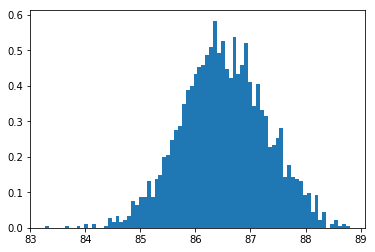

In [129]:
#Plotando o histograma da porcentagem de acerto dos classificadores:
plt.hist(lista_1, bins = 78, density = True);

É possível perceber que quando desconsideramos as ocorrências de 100% de acurácia, e focamos na variação de quando ãao da tal valor, podemos ver que de fato a base de treinamento realente influência no desempenho do classificador.